In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

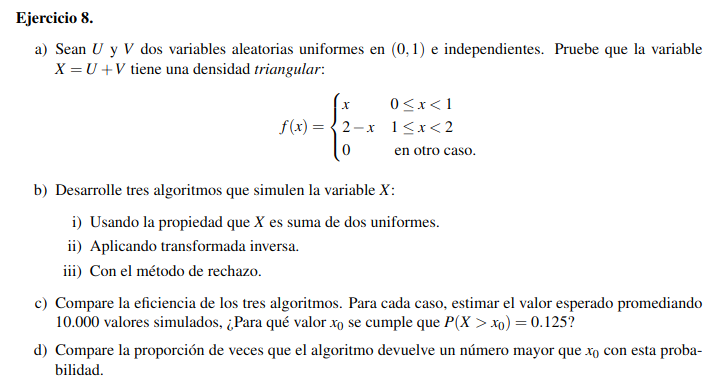


$f_X(x) = f_{U+V}(t) = ∫_{-∞}^{∞}f_U(x)f_V(t-x)dx =$

$f_U(x) = I_{(0,1)}(x) = 1 si x ∈ (0,1), 0 c.c.$
$f_U f_V = 0$ si $f_U = 0$ o $f_V = 0$ sii $x ∉ (0, 1)$ o $x ∉ (t - 1, t)$
- Si $t < 0$, entonces $f_U f_V = 0$
- Si $t > 2$, entonces $f_U f_V = 0$
- Si $0 ≤ t ≤ 1$ la longitud de $(0, 1) ∩ (t-1, t) = (0, t)$ entonces $f_U f_V = I_{(0, t)}$, luego $∫_{-∞}^{∞}f_U(x)f_V(t-x)dx = ∫_{-∞}^{∞} I_{(0, t)} = t$
- Si $1 < t ≤ 2$ la longitud de $(0, 1) ∩ (t-1, t) = (t-1, 1)$ entonces $f_U f_V = I_{(t-1, 1)}$, luego $∫_{-∞}^{∞}f_U(x)f_V(t-x)dx = ∫_{-∞}^{∞} I_{(t-1, 1)} = 2-t$


### Suma de dos uniformes

Como X es suma de dos uniformes igualmente distribuidas entonces una posibilidad para generarlo es la siguiente

In [2]:
def dos_uniformes():
    u = rd.uniform(0,1)
    v = rd.uniform(0,1)
    return u+v

### Metodo de la transformada inversa
Genero valores a partir de la funcion inversa de la distribucion de probabilidad, obtenida a partir de integrar la funcion de densidad de X.

Funcion de distribucion de probabilidad:
$$
F(x) = \begin{cases}
        0 & \text{para } x < 0 \\
        \frac{x^2}{2} & \text{para } 0 \leq x < 1 \\
        \frac{-x^2}{2} + 2x - 1 & \text{para } 1 \leq x < 2 \\
        1 & \text{para } x \geq 2    
        \end{cases}
$$

Luego la funcion inversa esta dividida entre los valores u <= 1/2 y u > 1/2:
$$
F^{-1}(u) = \begin{cases}
        \sqrt{2u} & \text{para } u \leq 1/2 \\
        2 - \sqrt{2(1-u)} & \text{para } u > 1/2
        \end{cases}
$$

In [3]:
def f_x(x):
    if 0 <= x < 1:
        return x
    elif 1 <= x < 2:
        return 2 - x
    else:
        return 0

def F_x(x):
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return x**2 / 2
    elif 1 <= x < 2:
        return -(x**2) / 2 + 2*x - 1
    else:
        return 1

def F_inv_x(x):
    if x < 0.5:
        return np.sqrt(2*x)
    else:
        return 2 - (2-2*x)**(1/2)

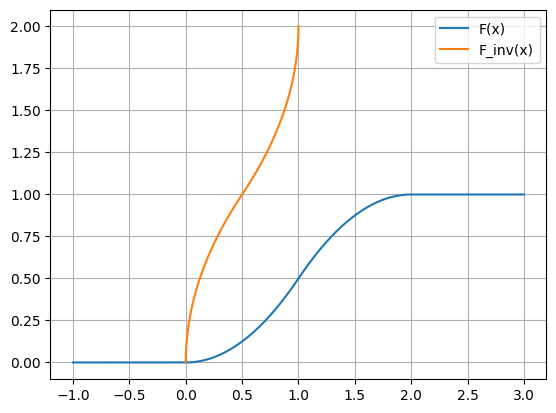

In [4]:
# grafico de las funciones de distribucion y la inversa
x = np.linspace(-1, 3, 1000)
x_inv = np.linspace(0, 1, 1000)

F_y = np.array([F_x(i) for i in x])
F_inv_y = np.array([F_inv_x(i) for i in x_inv])

plt.plot(x, F_y, label='F(x)')
plt.plot(x_inv, F_inv_y, label='F_inv(x)')
plt.legend()
plt.grid()
plt.show()

In [5]:
def tinversa_X():
    u = rd.random()
    return F_inv_x(u)

### Metodo de rechazo contra otra uniforme. 
Genero valores de una variable Y uniforme en el intervalo [0,2] (pues X esta definida en (0,2) y acepto si:
$$
u \lt \frac{f(x)}{c*g(x)}
$$

Para encontrar el c defino:
$$
h(x) = \frac{f(x)}{g(x)} = \begin{cases}
                            \frac{x}{\frac{1}{2}} & \text{para } 0 \leq x < 1 \\
                            \frac{2-x}{\frac{1}{2}} & \text{para } 1 \leq x < 2 \\
                            0 & \text{c.c}
                            \end{cases} 
\\
= \begin{cases}
    2x & \text{para } 0 \leq x < 1 \\
    2(2-x) & \text{para } 1 \leq x < 2 \\
    0 & \text{c.c}
\end{cases}
$$

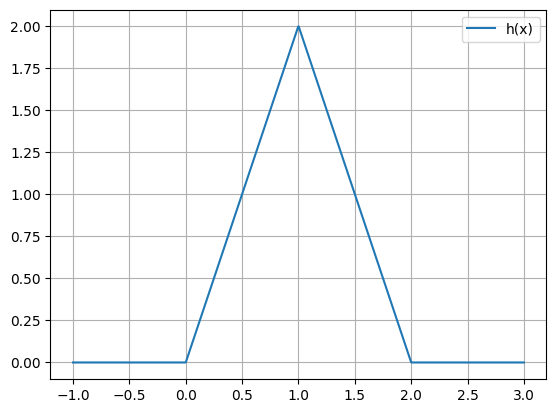

In [6]:
def h(x):
    if 0 <= x < 1:
        return 2*x
    elif 1 <= x < 2:
        return 4 - 2*x
    else:
        return 0

x_h = np.linspace(-1, 3, 1000)
y_h = np.array([h(i) for i in x_h])

plt.plot(x_h, y_h, label='h(x)')
plt.legend()
plt.grid()
plt.show()

Tiene maximo en h(1) = 2, entonces c = 2 y 
$$
\frac{f(x)}{c*g(x)} = \begin{cases}
                        x & \text{para } 0 \leq x < 1 \\
                        2-x & \text{para } 1 \leq x < 2 \\
                        0 & \text{c.c}
                        \end{cases}

$$


In [7]:
def arechazo_x():
    while True:
        # genero un valor de la uniforme entre 0 y 2.
        y = rd.uniform(0,2)
        u = rd.random()
        if u < 1/2 * h(y): # multiplico h(y) * 1/c
            return y

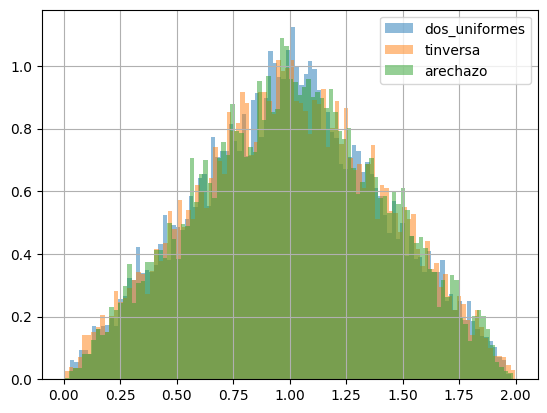

Esperanza dos_uniformes: 0.9952435951440871
Esperanza tinversa: 1.0004218425417
Esperanza arechazo: 1.0071622500300232


In [8]:
# comparo los 3 histogramas de los 3 metodos generados y calculo las esperanzas
nsims = 10000

sim_dos_uniformes = np.array([dos_uniformes() for i in range(nsims)])
sim_tinversa = np.array([tinversa_X() for i in range(nsims)])
sim_arechazo = np.array([arechazo_x() for i in range(nsims)])

plt.hist(sim_dos_uniformes, bins=100, density=True, alpha=0.5, label='dos_uniformes')
plt.hist(sim_tinversa, bins=100, density=True, alpha=0.5, label='tinversa')
plt.hist(sim_arechazo, bins=100, density=True, alpha=0.5, label='arechazo')
plt.legend()
plt.grid()
plt.show()

print('Esperanza dos_uniformes:', np.mean(sim_dos_uniformes))
print('Esperanza tinversa:', np.mean(sim_tinversa))
print('Esperanza arechazo:', np.mean(sim_arechazo))

Para calcular $x_0$ tal que $P(X > x_0) = 0.125$ necesito el $x_0$ tq:
$$
1 - P(X \leq x_0) = 0.125 \rightarrow P(X \leq x_0) = 0.875 \\
\text{Y esto ya lo se pq es simplemente evaluar la inversa en 0.875} \\
F^{-1}(0.875) = 2 - \sqrt{2(1-0.875)} = 1.5
$$

Veamos si generando 10000 valores de X  contando cuantos son > 1.5 obtenemos 0.125

In [9]:
nsims = 10000

cont_tinv = 0
cont_arechazo = 0
cont_dos_uniformes = 0

for i in range(nsims):
    if tinversa_X() > 1.5:
        cont_tinv += 1
    if arechazo_x() > 1.5:
        cont_arechazo += 1
    if dos_uniformes() > 1.5:
        cont_dos_uniformes += 1

print('P(X > 1.5) con metodo de la transformada inversa:', cont_tinv/nsims)
print('P(X > 1.5) con metodo de aceptacion y rechazo:', cont_arechazo/nsims)
print('P(X > 1.5) con metodo de dos uniformes:', cont_dos_uniformes/nsims)

P(X > 1.5) con metodo de la transformada inversa: 0.1303
P(X > 1.5) con metodo de aceptacion y rechazo: 0.1218
P(X > 1.5) con metodo de dos uniformes: 0.1254


Grafico la funcion de densidad de la variable con los valores generados por tinversa

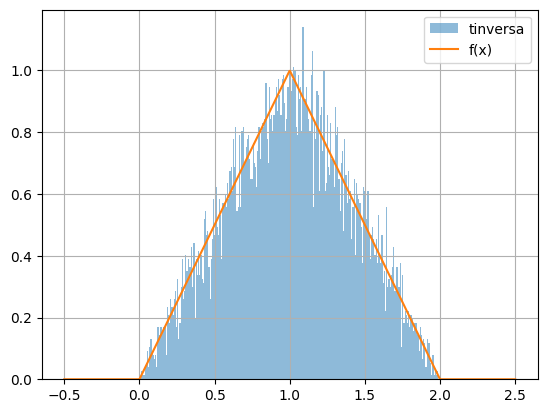

In [11]:
nsims = 10000
tinv_values = np.array([tinversa_X() for i in range(nsims)])

# genero valores para graficar f_x(x)
x = np.linspace(-0.5, 2.5, 1000)
y = np.array([f_x(i) for i in x])

plt.hist(tinv_values, bins=256, density=True, alpha=0.5, label='tinversa')
plt.plot(x, y, label='f(x)')
plt.legend()
plt.grid()
plt.show()
